In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt
import random
import numpy as np
import skimage.io as ski
import time

### Define paths, importa e plota algumas imagens

###### Paths

In [4]:
# subdivisão das imagens

letra = 'c'

In [5]:
# diretorio origem das imagens que serão editadas

diretorio = 'Fumaca'
#diretorio = 'Nao_Fumaca'


In [6]:
# diretorio aonde as imagens editadas serão salvas

diretorio_destino = diretorio
#diretorio_destino = 'Fumaca'
#diretorio_destino = 'Nao_Fumaca'


In [7]:
# etapa (treinamento (classificação ou detecção) ou validação (classificação e detecção))

#etapa = 'Treinamento Classificação'
#etapa = 'Treinamento Detecção'
etapa = 'Validacao - Classificação e Deteçcão'

In [8]:
# path aonde as imagens que serão editadas estão localizadas

path = f'/content/drive/MyDrive/23.1 Visão Computacional/Trabalho final/Pre processamento/{etapa}/{diretorio_destino}/2. Cropped/cropped {letra}/'

In [9]:
# path aonde as imagens editadas serão salvas

path2 = f'/content/drive/MyDrive/23.1 Visão Computacional/Trabalho final/Pre processamento/{etapa}/{diretorio_destino}/3. Augmented/augmented {letra}/'

In [10]:
# garante que o diretorio destino (path2) está vazio

if etapa == 'Treinamento Classificação' or  etapa == 'Treinamento Detecção':
  assert len(os.listdir(f"{path2}")) == 0


##### Plota algumas imagens

In [ ]:
 # salva os nomes das imagens antes das edições

list_imagens_originais = os.listdir(f'{path}')
list_imagens_originais.sort()

In [ ]:
len(list_imagens_originais)

14

In [ ]:
list_imagens_originais[0:5]

['10.png', '11.png', '12.png', '13.png', '14.png']

In [ ]:
 # salva os nomes das imagens antes das edições

nome_imagens_originais = []

for i in list_imagens_originais:
  nome_imagens_originais.append(i.strip('.jpeg')) # pega somente o nome da imagem (e exclui a extensão)

In [ ]:
# salva as imagens antes das edições

imagens_originais = [cv2.imread(f'{path}/{i}') for i in list_imagens_originais] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

In [ ]:
assert type(imagens_originais[0]) == np.ndarray

In [ ]:
i = len(imagens_originais)
i

14

In [ ]:
coluna = 4
linha = 4# int(i/4) if i%4 == 0 else int((i- i%4)/4)
if linha > 4:
  linha = 4
linha,coluna

(4, 4)

In [ ]:
# time.sleep(10)

# f, coords = plt.subplots(linha,coluna)
# for i in range(linha):
#   for j in range(coluna):
#     coords[i,j].imshow(random.choice(imagens_originais), cmap = 'gray')


### Altera rotação das imagens

In [ ]:
# https://www.geeksforgeeks.org/python-opencv-cv2-rotate-method/

###### Upload das Imagens

In [22]:
# Editar todas as imagens (inclui outras previamente editadas)


In [23]:
list_imagens = os.listdir(f'{path}')
list_imagens

['201.png',
 '202.png',
 '203.png',
 '204.png',
 '205.png',
 '206.png',
 '207.png',
 '208.png',
 '209.png',
 '210.png',
 '211.png',
 '212.png',
 '213.png',
 '214.png',
 '215.png',
 '216.png',
 '217.png',
 '218.png']

In [24]:
# pega somente o nome da imagem (e exclui a extensão)
nome_imagens = []

for i in list_imagens:
  nome_imagens.append(i.strip('.png')) if 'png' in list_imagens[0] else nome_imagens.append(i.strip('.jpeg'))
nome_imagens[0:5]

['201', '202', '203', '204', '205']

In [25]:
imagens = [cv2.imread(f'{path}/{i}.png') for i in nome_imagens] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

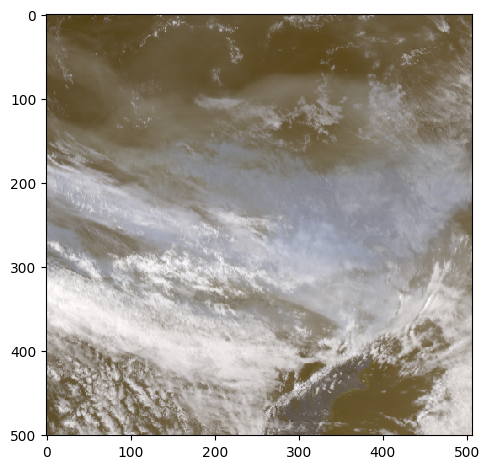

In [26]:
ski.imshow(imagens[0])

###### Rotaciona 0 Graus

In [27]:
# apenas faz uma cópia das imagens originais para o diretorio 0 grau de augmented

In [52]:
rotacao = '0 graus'

In [53]:
for img in os.listdir(f'{path}'):
  shutil.copy(
      f'{path}/{img}',
      f"{path2}/{rotacao}/{rotacao}{img.strip('.png')}.png")
     # f'/content/drive/MyDrive/23.1 Visão Computacional/Trabalho final/Imagens/{treinamento}/{diretorio_destino }/3. Augmented/augmented {letra}/0 graus')

###### Rotaciona 90 Graus

In [44]:
rotacao = '90 graus'

In [43]:
for i,imagem in enumerate(imagens):
  cv2.imwrite(f'{rotacao}{nome_imagens[i]}.png', cv2.rotate(imagem, cv2.ROTATE_90_CLOCKWISE))

In [45]:
for imagem in os.listdir('/content'):
  try:
    if 'png' in imagem:
      shutil.move(f'{imagem}',f'{path2}/{rotacao}')

    if 'jpeg' in imagem:
      shutil.move(f'{imagem}',f'{path2}/{rotacao}')
  except:
    pass
    print(f'{imagem} não foi movida')


###### Rotaciona 180 Graus

In [47]:
rotacao = '180 graus'

In [46]:
for i,imagem in enumerate(imagens):
  cv2.imwrite(f'{rotacao}{nome_imagens[i]}.png',cv2.rotate(imagem, cv2.ROTATE_180))

In [48]:
for imagem in os.listdir('/content'):
  try:
    if 'png' in imagem:
      shutil.move(f'{imagem}',f'{path2}/{rotacao}')

    if 'jpeg' in imagem:
      shutil.move(f'{imagem}',f'{path2}/{rotacao}')
  except:
    pass
    print(f'{imagem} não foi movida')


###### Rotaciona 270 Graus

In [50]:
rotacao = '270 graus'

In [49]:
for i,imagem in enumerate(imagens):
  cv2.imwrite(f'{rotacao}{nome_imagens[i]}.png',cv2.rotate(imagem, cv2.ROTATE_90_COUNTERCLOCKWISE))

In [51]:
for imagem in os.listdir('/content'):
  try:
    if 'png' in imagem:
      shutil.move(f'{imagem}',f'{path2}/{rotacao}')

    if 'jpeg' in imagem:
      shutil.move(f'{imagem}',f'{path2}/{rotacao}')
  except:
    pass
    print(f'{imagem} não foi movida')


270 graus209.png não foi movida
270 graus210.png não foi movida
270 graus217.png não foi movida
270 graus205.png não foi movida
270 graus206.png não foi movida
270 graus202.png não foi movida
270 graus214.png não foi movida
270 graus204.png não foi movida
270 graus201.png não foi movida
270 graus211.png não foi movida
270 graus213.png não foi movida
270 graus215.png não foi movida
270 graus212.png não foi movida
270 graus207.png não foi movida
270 graus208.png não foi movida
270 graus216.png não foi movida
270 graus218.png não foi movida
270 graus203.png não foi movida


##### nuke button

In [ ]:
# apaga as imagens

In [ ]:
for img in os.listdir('/content'):
  if 'png' in img:
   os.remove(img)

  if 'jpeg' in img:
   os.remove(img)


In [ ]:
# reseta as imagens  (desfaz os circulos q são adicionados in place)

In [ ]:
#imagens = [cv2.imread(f'{path}/{diretorio}/{i}.jpeg') for i in nome_imagens] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

### Altera dimensões da cor (HSV)

In [ ]:
# fundamentos de cores
# https://estudodacor.wordpress.com/aspectos-fisicos/dimensoes-da-cor/

#### Brilho

In [ ]:
# mudar brilho
# https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv

# hsv
# https://www.masterclass.com/articles/how-to-use-hsv-color-model-in-photography

# exemplo do procedimento no final desse bloco

###### Upload das Imagens originais (sem edições) (recomendado nessa etapa)

In [ ]:
# Editar somente as imagens originais (ignora outras previamente editadas))

In [ ]:
# diretorio = Nao_Fumaca (imagens antes das edicoes)
diretorio = diretorio

In [ ]:
list_imagens = list_imagens_originais#os.listdir(os.path.join(path,f'{diretorio}'))  # lista as imagens contidas no diretório

In [ ]:
 nome_imagens = nome_imagens_originais#[]

# for i in list_imagens:
#   nome_imagens.append(i.strip('.jpeg'))

In [ ]:
# pega somente o nome da imagem (e exclui a extensão)
# nome_imagens = []

# for i in list_imagens:
#   nome_imagens.append(i.strip('.jpeg'))

In [ ]:
imagens = imagens_originais#[cv2.imread(f'{path}/{diretorio}/{i}.jpeg') for i in nome_imagens] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

In [ ]:
len(imagens)

124

###### Upload das Imagens editadas  (não recomendado nessa etapa)

In [ ]:
# Editar todas as imagens (inclui outras previamente editadas)


In [ ]:
list_imagens = os.listdir(f'{path}/{diretorio}')

In [ ]:
# pega somente o nome da imagem (e exclui a extensão)
nome_imagens = []

for i in list_imagens:
  nome_imagens.append(i.strip('.jpeg'))

In [ ]:
imagens = [cv2.imread(f'{path}/{diretorio}/{i}.jpeg') for i in nome_imagens] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

In [ ]:
list_imagens

['imagem(23)_fig(2).jpeg',
 'imagem(23)_fig(6).jpeg',
 'imagem(23)_fig(4).jpeg',
 'imagem(20)_fig(11).jpeg',
 'imagem(20)_fig(6).jpeg',
 'imagem(20)_fig(7).jpeg',
 'imagem(23)_fig(5).jpeg',
 'imagem(23)_fig(10).jpeg',
 'imagem(23)_fig(8).jpeg',
 'imagem(23)_fig(9).jpeg',
 'imagem(23)_fig(3).jpeg',
 'imagem(23)_fig(1).jpeg',
 'imagem(23)_fig(11).jpeg',
 'imagem(23)_fig(0).jpeg',
 'imagem(20)_fig(10).jpeg',
 'imagem(23)_fig(7).jpeg',
 'imagem(20)_fig(0).jpeg',
 'imagem(20)_fig(3).jpeg',
 'imagem(17)_fig(6).jpeg',
 'imagem(20)_fig(2).jpeg',
 'imagem(20)_fig(8).jpeg',
 'imagem(18)_fig(5).jpeg',
 'imagem(18)_fig(8).jpeg',
 'imagem(20)_fig(1).jpeg',
 'imagem(18)_fig(11).jpeg',
 'imagem(17)_fig(9).jpeg',
 'imagem(20)_fig(5).jpeg',
 'imagem(18)_fig(10).jpeg',
 'imagem(18)_fig(3).jpeg',
 'imagem(18)_fig(6).jpeg',
 'imagem(20)_fig(4).jpeg',
 'imagem(18)_fig(7).jpeg',
 'imagem(18)_fig(9).jpeg',
 'imagem(20)_fig(9).jpeg',
 'imagem(18)_fig(4).jpeg',
 'imagem(18)_fig(0).jpeg',
 'imagem(17)_fig(11).j

In [ ]:
len(imagens)

180

##### Alterar Brilho

In [ ]:
#imagens = [cv2.imread(f'{path}/{diretorio}/{i}.jpeg') for i in nome_imagens] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

In [ ]:
len(os.listdir(f'{path}/{diretorio}'))

In [ ]:
brilho = int(input('Alterar Brilho \nValores positivos aumentam o brilho, valores negativos diminuem o brilho \n'))

Alterar Brilho 
Valores positivos aumentam o brilho, valores negativos diminuem o brilho 
30


In [ ]:
hsv = []

In [ ]:
for i,j in enumerate(imagens):
  hsv.append(cv2.cvtColor(imagens[i],cv2.COLOR_BGR2HSV))  # converte do formato RGB para o formato HSV

In [ ]:
try:
  for i,j in enumerate(hsv):
    for x in range(0, len(hsv[i])):
      for y in range(0, len(hsv[i][0])):
          hsv[i][x, y][2] += brilho   # altera o brilho (Valores positivos aumentam o brilho, valores negativos diminuem o brilho)

    hsv[i] = cv2.cvtColor(hsv[i], cv2.COLOR_HSV2BGR)  # converte do formato HSV para o formato RGB

    cv2.imwrite(f'{nome_imagens[i]}({brilho}Brilho).jpeg', hsv[i])  # salva as imagens

except: pass

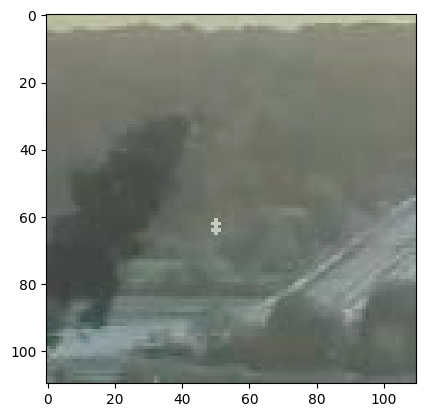

In [ ]:
plt.imshow(hsv[-1])

##### Move as imagens editadas

In [ ]:
for imagem in os.listdir('/content'):
  try:
    if 'png' in imagem:
      shutil.move(f'{imagem}',f'{path2}}')

    if 'jpeg' in imagem:
      shutil.move(f'{imagem}',f'{path2}')
  except:
    pass
    print(f'{imagem} não foi movida')

In [ ]:

path2

'/content/drive/MyDrive/23.1 Visão Computacional/Trabalho final/Fumaca/3. Augmented/augmented a'

#### Matiz

In [ ]:
# mudar matiz
# https://www.projectpro.io/recipes/change-color-space-of-image-opencv#:~:text=space%20using%20cv2.-,cvtColor(),conversion%20code%20as%20mandatory%20parameters.
# https://stackoverflow.com/questions/62648862/how-can-i-change-the-hue-of-a-certain-area-with-opencv-python

# exemplo do procedimento no final desse bloco

Nesta etapa, um espectro de cor é alterada para outro espectro de cor  (tentando simular mais cores de vegetação, por exemplo)

As cores são alteradas de acordo com metade de seu valor numérico na  representação em graus (abaixo)



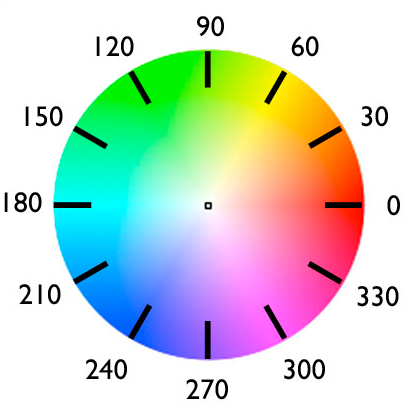

###### Upload das Imagens originais (sem edições) (não recomendado nessa etapa)

In [ ]:
# Editar somente as imagens originais (ignora outras previamente editadas))

In [ ]:
# diretorio = Nao_Fumaca (imagens antes das edicoes)
diretorio = diretorio

In [ ]:
list_imagens = list_imagens_originais#os.listdir(os.path.join(path,f'{diretorio}'))  # lista as imagens contidas no diretório

In [ ]:
 nome_imagens = nome_imagens_originais#[]

# for i in list_imagens:
#   nome_imagens.append(i.strip('.jpeg'))

In [ ]:
# pega somente o nome da imagem (e exclui a extensão)
# nome_imagens = []

# for i in list_imagens:
#   nome_imagens.append(i.strip('.jpeg'))

In [ ]:
imagens = imagens_originais#[cv2.imread(f'{path}/{diretorio}/{i}.jpeg') for i in nome_imagens] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

In [ ]:
imagens

[array([[[153, 163, 180],
         [151, 161, 178],
         [151, 161, 178],
         ...,
         [165, 171, 190],
         [166, 170, 189],
         [161, 165, 184]],
 
        [[151, 161, 178],
         [152, 162, 179],
         [156, 166, 183],
         ...,
         [162, 169, 186],
         [164, 168, 187],
         [160, 164, 182]],
 
        [[152, 161, 175],
         [152, 161, 175],
         [154, 163, 177],
         ...,
         [171, 176, 191],
         [169, 173, 191],
         [163, 168, 183]],
 
        ...,
 
        [[116, 102, 113],
         [109,  95, 106],
         [ 98,  84,  95],
         ...,
         [ 99,  91, 101],
         [ 98,  90, 101],
         [ 98,  90, 100]],
 
        [[122, 109, 117],
         [113, 100, 108],
         [100,  87,  95],
         ...,
         [105,  97, 104],
         [103,  94, 104],
         [102,  94, 101]],
 
        [[123, 110, 118],
         [113, 100, 108],
         [100,  87,  95],
         ...,
         [109, 101, 108],
  

###### Upload das Imagens editadas  (recomendado nessa etapa)

In [ ]:
# Editar todas as imagens (inclui outras previamente editadas)


In [ ]:
list_imagens = os.listdir(f'{path}/{diretorio}')

In [ ]:
# pega somente o nome da imagem (e exclui a extensão)
nome_imagens = []

for i in list_imagens:
  nome_imagens.append(i.strip('.jpeg'))

In [ ]:
imagens = [cv2.imread(f'{path}/{diretorio}/{i}.jpeg') for i in nome_imagens] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

In [ ]:
list_imagens

['imagem(23)_fig(1).jpeg',
 'imagem(23)_fig(8).jpeg',
 'imagem(23)_fig(4).jpeg',
 'imagem(23)_fig(9).jpeg',
 'imagem(23)_fig(6).jpeg',
 'imagem(23)_fig(0).jpeg',
 'imagem(23)_fig(7).jpeg',
 'imagem(23)_fig(5).jpeg',
 'imagem(23)_fig(10).jpeg',
 'imagem(20)_fig(4).jpeg',
 'imagem(20)_fig(6).jpeg',
 'imagem(20)_fig(3).jpeg',
 'imagem(20)_fig(9).jpeg',
 'imagem(20)_fig(2).jpeg',
 'imagem(23)_fig(2).jpeg',
 'imagem(20)_fig(8).jpeg',
 'imagem(20)_fig(0).jpeg',
 'imagem(23)_fig(3).jpeg',
 'imagem(20)_fig(10).jpeg',
 'imagem(20)_fig(7).jpeg',
 'imagem(17)_fig(0).jpeg',
 'imagem(17)_fig(5).jpeg',
 'imagem(20)_fig(5).jpeg',
 'imagem(17)_fig(10).jpeg',
 'imagem(18)_fig(9).jpeg',
 'imagem(20)_fig(1).jpeg',
 'imagem(17)_fig(3).jpeg',
 'imagem(17)_fig(2).jpeg',
 'imagem(17)_fig(7).jpeg',
 'imagem(17)_fig(9).jpeg',
 'imagem(17)_fig(11).jpeg',
 'imagem(17)_fig(6).jpeg',
 'imagem(17)_fig(8).jpeg',
 'imagem(17)_fig(1).jpeg',
 'imagem(13)_fig(1).jpeg',
 'imagem(13)_fig(4).jpeg',
 'imagem(14)_fig(2).jpeg

In [ ]:
len(imagens)

940

###### Alterar Matiz (de verde para roxo)

In [ ]:
# Carrega as imagens com o canal Alpha (carrega todas as imagens, inclusive as que tiveram Matiz alterada)
#img_alpha = [cv2.imread(f'{path}/{diretorio}/{i}.jpeg',cv2.IMREAD_UNCHANGED) for i in nome_imagens] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

In [ ]:
# Carrega as imagens com o canal Alpha (ignora imagens com Matiz alterada)
img_alpha = [cv2.imread(f'{path}/{diretorio}/{i}',cv2.IMREAD_UNCHANGED) for i in os.listdir(f'{path}/{diretorio}') if not 'Verde' in i] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

In [ ]:
# Extrai o canal Alpha
alpha = []
for img in img_alpha:
  alpha.append(img[:,:,2])

In [ ]:
# Extrai os canais BRG
brg = []
for img in img_alpha:
  brg.append(img[:,:,0:3])

In [ ]:
# converte para HSV
hsv = []
h,s,v = list(range(0,len(brg))),list(range(0,len(brg))),list(range(0,len(brg)))
for i, img in enumerate(brg):
  hsv.append(cv2.cvtColor(brg[i], cv2.COLOR_BGR2HSV))
#h = hsv[:,:,0]
#s = hsv[:,:,1]
#v = hsv[:,:,2]
  h[i],s[i],v[i] = cv2.split(hsv[i])

In [ ]:
# purple is 276 in range 0 to 360; so half in OpenCV
# green is 120 in range 0 to 360; so half in OpenCV
purple = 138
green = 60

In [ ]:
# diff color (green - hue)
diff_color = green - purple

In [ ]:
# modify hue channel by adding difference and modulo 180
# Modifica o novo canal h (matiz)
novo_h = []

for i, img in enumerate(h):
  novo_h.append(np.mod(h[i] + diff_color, 180).astype(np.uint8))

In [ ]:
# recombina os canais
novo_hsv = []

for i, img in enumerate(novo_h):
  novo_hsv.append(cv2.merge([novo_h[i],s[i],v[i]]))

In [ ]:
# Converte de volga pra BGR
novo_bgr = []

for i, img in enumerate(novo_hsv):
  novo_bgr.append(cv2.cvtColor(novo_hsv[i], cv2.COLOR_HSV2BGR))

In [ ]:
# Coloca o Alpha de volta
bgr_alpha = []

for i, img in enumerate(novo_bgr):
  bgr_alpha.append(cv2.cvtColor(novo_bgr[i], cv2.COLOR_BGR2BGRA))
  bgr_alpha[i][:,:,3] = alpha[i]


In [ ]:
i = 5 #int(input('Qual imagem a ser mostrada?  '))

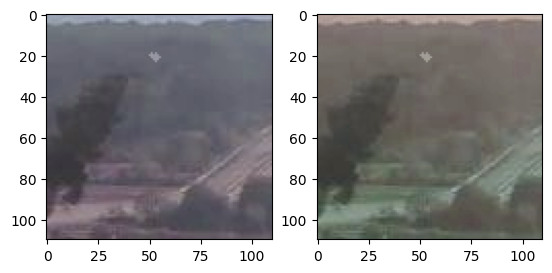

In [ ]:
f, coords = plt.subplots(1,2)

coords[0].imshow(img_alpha[i])
coords[1].imshow(novo_bgr[i])

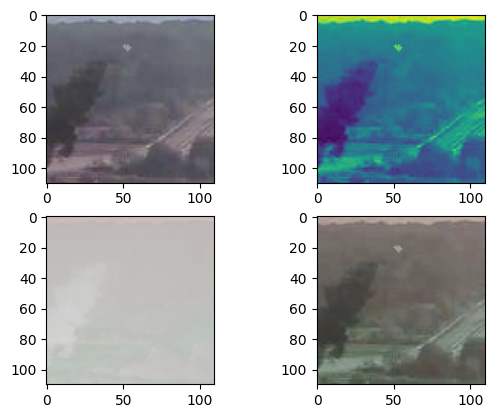

In [ ]:
# Plota outros canais (imagem original, alpha, bgr com alpha e imagem final alterada)

f, coords = plt.subplots(2,2)
coords[0,0].imshow(img_alpha[i])
coords[0,1].imshow(alpha[i])
coords[1,0].imshow(bgr_alpha[i])
coords[1,1].imshow(novo_bgr[i])

In [ ]:
#plt.imshow(novo_bgr[i])

In [ ]:
#plt.imshow(img_alpha[i])

In [ ]:
len(novo_bgr)

940

In [ ]:
nome_imagens

['imagem(23)_fig(1)',
 'imagem(23)_fig(8)',
 'imagem(23)_fig(4)',
 'imagem(23)_fig(9)',
 'imagem(23)_fig(6)',
 'imagem(23)_fig(0)',
 'imagem(23)_fig(7)',
 'imagem(23)_fig(5)',
 'imagem(23)_fig(10)',
 'imagem(20)_fig(4)',
 'imagem(20)_fig(6)',
 'imagem(20)_fig(3)',
 'imagem(20)_fig(9)',
 'imagem(20)_fig(2)',
 'imagem(23)_fig(2)',
 'imagem(20)_fig(8)',
 'imagem(20)_fig(0)',
 'imagem(23)_fig(3)',
 'imagem(20)_fig(10)',
 'imagem(20)_fig(7)',
 'imagem(17)_fig(0)',
 'imagem(17)_fig(5)',
 'imagem(20)_fig(5)',
 'imagem(17)_fig(10)',
 'imagem(18)_fig(9)',
 'imagem(20)_fig(1)',
 'imagem(17)_fig(3)',
 'imagem(17)_fig(2)',
 'imagem(17)_fig(7)',
 'imagem(17)_fig(9)',
 'imagem(17)_fig(11)',
 'imagem(17)_fig(6)',
 'imagem(17)_fig(8)',
 'imagem(17)_fig(1)',
 'imagem(13)_fig(1)',
 'imagem(13)_fig(4)',
 'imagem(14)_fig(2)',
 'imagem(15)_fig(0)',
 'imagem(15)_fig(6)',
 'imagem(15)_fig(8)',
 'imagem(15)_fig(11)',
 'imagem(12)_fig(6)',
 'imagem(15)_fig(4)',
 'imagem(14)_fig(0)',
 'imagem(15)_fig(1)',
 'ima

In [ ]:
# Salva as imagens
for i,imagem in enumerate(novo_bgr):
  cv2.imwrite(f'{nome_imagens[i]}(Verde-Roxo).jpeg',imagem)

###### Alterar Matiz (de verde para azul)

In [ ]:
# Carrega as imagens com o canal Alpha (carrega todas as imagens, inclusive as que tiveram Matiz alterada)
#img_alpha = [cv2.imread(f'{path}/{diretorio}/{i}.jpeg',cv2.IMREAD_UNCHANGED) for i in nome_imagens] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

In [ ]:
# Carrega as imagens com o canal Alpha (ignora imagens com Matiz alterada)
img_alpha = [cv2.imread(f'{path}/{diretorio}/{i}',cv2.IMREAD_UNCHANGED) for i in os.listdir(f'{path}/{diretorio}') if not 'Verde' in i] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

In [ ]:
# Extrai o canal Alpha
alpha = []
for img in img_alpha:
  alpha.append(img[:,:,2])

In [ ]:
# Extrai os canais BRG
brg = []
for img in img_alpha:
  brg.append(img[:,:,0:3])

In [ ]:
# converte para HSV
hsv = []
h,s,v = list(range(0,len(brg))),list(range(0,len(brg))),list(range(0,len(brg)))
for i, img in enumerate(brg):
  hsv.append(cv2.cvtColor(brg[i], cv2.COLOR_BGR2HSV))
#h = hsv[:,:,0]
#s = hsv[:,:,1]
#v = hsv[:,:,2]
  h[i],s[i],v[i] = cv2.split(hsv[i])

In [ ]:
# blue is 240 in range 0 to 360; so half in OpenCV
# green is 120 in range 0 to 360; so half in OpenCV
blue = 120
green = 60

In [ ]:
# diff color (green - hue)
diff_color = green - blue

In [ ]:
# modify hue channel by adding difference and modulo 180
# Modifica o novo canal h (matiz)
novo_h = []

for i, img in enumerate(h):
  novo_h.append(np.mod(h[i] + diff_color, 180).astype(np.uint8))

In [ ]:
# recombina os canais
novo_hsv = []

for i, img in enumerate(novo_h):
  novo_hsv.append(cv2.merge([novo_h[i],s[i],v[i]]))

In [ ]:
# Converte de volga pra BGR
novo_bgr = []

for i, img in enumerate(novo_hsv):
  novo_bgr.append(cv2.cvtColor(novo_hsv[i], cv2.COLOR_HSV2BGR))

In [ ]:
# Coloca o Alpha de volta
bgr_alpha = []

for i, img in enumerate(novo_bgr):
  bgr_alpha.append(cv2.cvtColor(novo_bgr[i], cv2.COLOR_BGR2BGRA))
  bgr_alpha[i][:,:,3] = alpha[i]


In [ ]:
i = -1#int(input('Qual imagem a ser mostrada?  '))

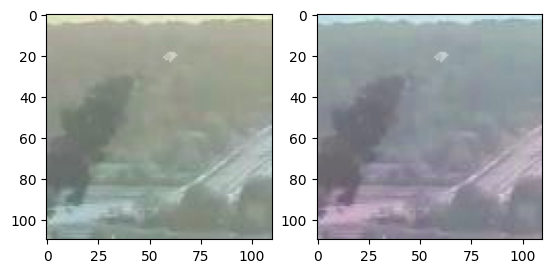

In [ ]:
f, coords = plt.subplots(1,2)

coords[0].imshow(img_alpha[i])
coords[1].imshow(novo_bgr[i])

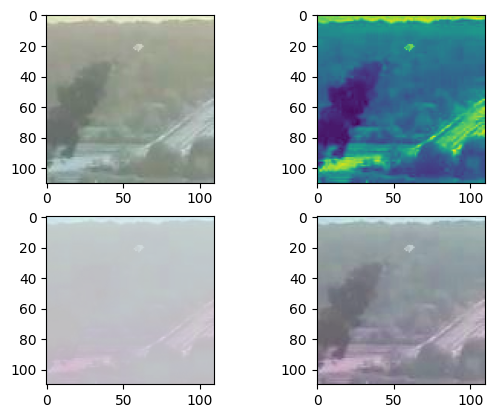

In [ ]:
# Plota outros canais (imagem original, alpha, bgr com alpha e imagem final alterada)

f, coords = plt.subplots(2,2)
coords[0,0].imshow(img_alpha[i])
coords[0,1].imshow(alpha[i])
coords[1,0].imshow(bgr_alpha[i])
coords[1,1].imshow(novo_bgr[i])

In [ ]:
#plt.imshow(img_alpha[i])

In [ ]:
#plt.imshow(novo_bgr[i])

In [ ]:
# Salva as imagens
for i,imagem in enumerate(novo_bgr):
  cv2.imwrite(f'{nome_imagens[i]}(Verde-Azul).jpeg', imagem)


###### Alterar Matiz (de verde para laranja)

In [ ]:
# Carrega as imagens com o canal Alpha (carrega todas as imagens, inclusive as que tiveram Matiz alterada)
#img_alpha = [cv2.imread(f'{path}/{diretorio}/{i}.jpeg',cv2.IMREAD_UNCHANGED) for i in nome_imagens] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

In [ ]:
# Carrega as imagens com o canal Alpha (ignora imagens com Matiz alterada)
img_alpha = [cv2.imread(f'{path}/{diretorio}/{i}',cv2.IMREAD_UNCHANGED) for i in os.listdir(f'{path}/{diretorio}') if not 'Verde' in i] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

In [ ]:
# Extrai o canal Alpha
alpha = []
for img in img_alpha:
  alpha.append(img[:,:,2])

In [ ]:
# Extrai os canais BRG
brg = []
for img in img_alpha:
  brg.append(img[:,:,0:3])

In [ ]:
# converte para HSV
hsv = []
h,s,v = list(range(0,len(brg))),list(range(0,len(brg))),list(range(0,len(brg)))
for i, img in enumerate(brg):
  hsv.append(cv2.cvtColor(brg[i], cv2.COLOR_BGR2HSV))
#h = hsv[:,:,0]
#s = hsv[:,:,1]
#v = hsv[:,:,2]
  h[i],s[i],v[i] = cv2.split(hsv[i])

In [ ]:
# blue is 240 in range 0 to 360; so half in OpenCV
# green is 120 in range 0 to 360; so half in OpenCV
orange = 17
green = 60

In [ ]:
# diff color (green - hue)
diff_color = green - orange

In [ ]:
# modify hue channel by adding difference and modulo 180
# Modifica o novo canal h (matiz)
novo_h = []

for i, img in enumerate(h):
  novo_h.append(np.mod(h[i] + diff_color, 180).astype(np.uint8))

In [ ]:
# recombina os canais
novo_hsv = []

for i, img in enumerate(novo_h):
  novo_hsv.append(cv2.merge([novo_h[i],s[i],v[i]]))

In [ ]:
# Converte de volga pra BGR
novo_bgr = []

for i, img in enumerate(novo_hsv):
  novo_bgr.append(cv2.cvtColor(novo_hsv[i], cv2.COLOR_HSV2BGR))

In [ ]:
# Coloca o Alpha de volta
bgr_alpha = []

for i, img in enumerate(novo_bgr):
  bgr_alpha.append(cv2.cvtColor(novo_bgr[i], cv2.COLOR_BGR2BGRA))
  bgr_alpha[i][:,:,3] = alpha[i]


In [ ]:
i = -1 #int(input('Qual imagem a ser mostrada?'))

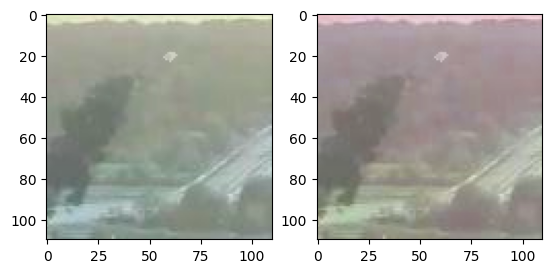

In [ ]:
f, coords = plt.subplots(1,2)

coords[0].imshow(img_alpha[i])
coords[1].imshow(novo_bgr[i])

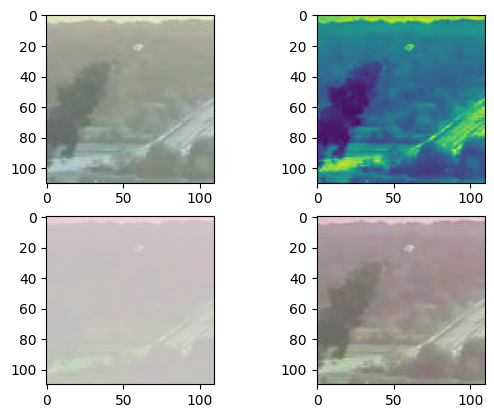

In [ ]:
# Plota outros canais (imagem original, alpha, bgr com alpha e imagem final alterada)

f, coords = plt.subplots(2,2)
coords[0,0].imshow(img_alpha[i])
coords[0,1].imshow(alpha[i])
coords[1,0].imshow(bgr_alpha[i])
coords[1,1].imshow(novo_bgr[i])

In [ ]:
#plt.imshow(img_alpha[i])

In [ ]:
#plt.imshow(novo_bgr[i])

In [ ]:
# Salva as imagens
for i,imagem in enumerate(novo_bgr):
  cv2.imwrite(f'{nome_imagens[i]}(Verde-Laranja).jpeg', imagem)


##### Move as imagens editadas

In [ ]:
for imagem in os.listdir('/content'):
  try:
    if 'png' in imagem:
      shutil.move(f'{imagem}',f'{path2}}')

    if 'jpeg' in imagem:
      shutil.move(f'{imagem}',f'{path2}')
  except:
    pass
    print(f'{imagem} não foi movida')

In [ ]:

path2

'/content/drive/MyDrive/23.1 Visão Computacional/Trabalho final/Fumaca/3. Augmented/augmented a'

##### nuke button

In [ ]:
# apaga as imagens

In [ ]:
for img in os.listdir('/content'):
  if 'PNG' in img:
   os.remove(img)

  if 'JPEG' in img:
   os.remove(img)


### RGB

In [ ]:
# Editar somente as imagens originais (ignora outras previamente editadas))

#list_imagens = os.listdir(os.path.join(path,'Nao fumaca (imagens antes das edicoes)'))  # lista as imagens contidas no diretório


In [ ]:
# Editar todas as imagens (inclui outras previamente editadas)

#list_imagens = os.listdir(f'{path}/{diretorio}')

In [ ]:
#hsv = []

In [ ]:
#for i,j in enumerate(imagens):
#  hsv.append(cv2.cvtColor(imagens[i],cv2.COLOR_BGR2HSV))  # converte do formato RGB para o formato HSV

In [ ]:
# try:
#   for i,j in enumerate(hsv):
#     for x in range(0, len(hsv[i])):
#       for y in range(0, len(hsv[i][0])):
#           hsv[i][x, y][1] += matiz   # altera o brilho (Valores positivos aumentam o brilho, valores negativos diminuem o brilho)

#     hsv[i] = cv2.cvtColor(hsv[i], cv2.COLOR_HSV2BGR)  # converte do formato HSV para o formato RGB

#     cv2.imwrite(f'{list_imagens[i]}({matiz}Matiz).jpeg', hsv[i])  # salva as imagens

# except: pass

In [ ]:
#plt.imshow(hsv[125])

##### Move as imagens editadas

In [ ]:
for imagem in os.listdir('/content'):
  try:
    if 'png' in imagem:
      shutil.move(f'{imagem}',f'{path2}}')

    if 'jpeg' in imagem:
      shutil.move(f'{imagem}',f'{path2}')
  except:
    pass
    print(f'{imagem} não foi movida')

In [ ]:

path2

'/content/drive/MyDrive/23.1 Visão Computacional/Trabalho final/Fumaca/3. Augmented/augmented a'

##### nuke button

In [ ]:
# apaga as imagens

In [ ]:
for img in os.listdir('/content'):
  if 'PNG' in img:
   os.remove(img)

  if 'JPEG' in img:
   os.remove(img)


##### Saturação

In [ ]:
# mudar saturação
# https://stackoverflow.com/questions/8535650/how-to-change-saturation-values-with-opencv

##### Move as imagens editadas

In [ ]:
for imagem in os.listdir('/content'):
  try:
    if 'Corte' in imagem:
      shutil.move(f'{imagem}',f'{path2}/{diretorio_destino}')

    if 'imagem' in imagem:
      shutil.move(f'{imagem}',f'{path2}/{diretorio_destino}')
  except:
    pass
    print(f'{imagem} não foi movida')


##### nuke button

In [ ]:
# apaga as imagens

In [ ]:
for img in os.listdir('/content'):
  if 'Corte' in img:
   os.remove(img)

  if 'imagem' in img:
   os.remove(img)


In [ ]:
# reseta as imagens  (desfaz os circulos q são adicionados in place)

In [ ]:
#imagens = [cv2.imread(f'{path}/{diretorio}/{i}.jpeg') for i in nome_imagens] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens

### Master Reset

In [ ]:
# reseta as imagens para o original

In [ ]:
# necessario deletar a pasta Nao_Fumaca  (copia as imagens do diretorio backup para o diretorio Nao_Fumaca)

In [ ]:
path3 = '/content/drive/MyDrive/Artigos Científicos/Rede Neural/Treinamento_N (originais)'
#path3 = '/content/drive/MyDrive/Rede Neural/Treinamento_N (originais)'

In [ ]:
path4 = '/content/drive/MyDrive/Artigos Científicos/Rede Neural/Treinamento_N'
#path4 = '/content/drive/MyDrive/Rede Neural/Treinamento_N'

In [ ]:
for imagem in os.listdir(f'{path3}/Nao fumaca (imagens antes das edicoes)'):
  shutil.copy(f'{path3}/Nao fumaca (imagens antes das edicoes)/{imagem}',f'{path4}/Nao_Fumaca')

In [ ]:
for imagem in os.listdir(f'{path3}/Nao fumaca (imagens antes das edicoes)'):
  shutil.copy(f'{path3}/Fumaca/{imagem}',f'{path4}/Fumaca')

In [ ]:
len(os.listdir(f'{path}/{diretorio}'))

1905

### Master Nuke Button

In [ ]:
# Apaga imagens no diretorio especifico de acordo com alguma condicao

In [ ]:
path

'/content/drive/MyDrive/Rede Neural/Treinamento_N'

In [ ]:
diretorio

'Nao_Fumaca'

In [ ]:
condicao = 'Corte'

In [ ]:
for imagem in os.listdir(f'{path}/{diretorio}'):
  if condicao in imagem:
   os.remove(f'{path}/{diretorio}/{imagem}')
    #shutil.copy(f'{path}/{diretorio}/{imagem}',f'{path}/z Demonstracao/')


### Nuke Button Especial

In [ ]:
# deleta as imagens de acordo com a condicao e com o nomes especificos

In [ ]:
# faz a limpeza dos dados após análise

#### Imagens Nao Fumaça

In [ ]:
diretorio = 'Nao_Fumaca'

In [ ]:
# determina quais imagens devem ser deletadas

imagens = range(0,15)
#imagens = range(0,200)#[134,135,137,138,139,140,141,143,144,145,146,147,149,150,151,152,153]
brilho = [-45,-30,-15,15,30,45]


In [ ]:
lista_imagens = os.listdir(f'{path}/{diretorio}')

In [ ]:
#lista_imagens

In [ ]:
# apaga as imagens com brilho e rotação
try:
  for i in imagens:
    for j in brilho:

      # if f'Corte{i}({j}Brilho).jpeg' in lista_imagens:
      #   os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho).jpeg')
      #   print(f'Corte{i}({j}Brilho).jpeg')

      if f'Corte{i}({j}Brilho)(Verde->Azul)(90_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(90_Graus).jpeg')
        print(f'Corte{i}({j})Brilho)(90_Graus).jpeg')

      if f'Corte{i}({j}Brilho)(Verde->Azul).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(180_Graus).jpeg')
        print(f'Corte{i}({j}Brilho)(180_Graus).jpeg')

      if f'Corte{i}({j}Brilho)(270_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(270_Graus).jpeg')
        print(f'Corte{i}({j}Brilho)((270_Graus).jpeg')

except: pass

Corte1(-45Brilho.jpeg
Corte1(-45Brilho)(180_Graus).jpeg
Corte1(-45Brilho)((270_Graus).jpeg
Corte1(-30Brilho.jpeg
Corte1(-30Brilho)(180_Graus).jpeg
Corte1(-30Brilho)((270_Graus).jpeg
Corte1(-15Brilho.jpeg
Corte1(-15Brilho)(180_Graus).jpeg
Corte1(-15Brilho)((270_Graus).jpeg
Corte1(15Brilho.jpeg
Corte1(15Brilho)(180_Graus).jpeg
Corte1(15Brilho)((270_Graus).jpeg
Corte1(30Brilho.jpeg
Corte1(30Brilho)(180_Graus).jpeg
Corte1(30Brilho)((270_Graus).jpeg
Corte1(45Brilho.jpeg
Corte1(45Brilho)(180_Graus).jpeg
Corte1(45Brilho)((270_Graus).jpeg
Corte2(-45Brilho.jpeg
Corte2(-45Brilho)(180_Graus).jpeg
Corte2(-45Brilho)((270_Graus).jpeg
Corte2(-30Brilho.jpeg
Corte2(-30Brilho)(180_Graus).jpeg
Corte2(-30Brilho)((270_Graus).jpeg
Corte2(-15Brilho.jpeg
Corte2(-15Brilho)(180_Graus).jpeg
Corte2(-15Brilho)((270_Graus).jpeg
Corte2(15Brilho.jpeg
Corte2(15Brilho)(180_Graus).jpeg
Corte2(15Brilho)((270_Graus).jpeg
Corte2(30Brilho.jpeg
Corte2(30Brilho)(180_Graus).jpeg
Corte2(30Brilho)((270_Graus).jpeg
Corte2(45Brilh

In [ ]:
# apaga as imagens com brilho, de matiz azul e com rotação
try:
  for i in imagens:
    for j in brilho:

      # if f'Corte{i}({j}Brilho)(Verde->Azul).jpeg' in lista_imagens:
      #   os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(Verde->Azul).jpeg')
      #   print(f'Corte{i}({j}Brilho)(Verde->Azul).jpeg')

      if f'Corte{i}({j}Brilho)(Verde->Azul)(90_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(Verde->Azul)(90_Graus).jpeg')
        print(f'Corte{i}({j}Brilho)(Verde->Azul)(90_Graus).jpeg')

      if f'Corte{i}({j}Brilho)(Verde->Azul)(180_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(Verde->Azul)(180_Graus).jpeg')
        print(f'Corte{i}({j}Brilho)(Verde->Azul)(180_Graus).jpeg')

      if f'Corte{i}({j}Brilho)(Verde->Azul)(270_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(Verde->Azul)(270_Graus).jpeg')
        print(f'Corte{i}({j}Brilho)(Verde->Azul)(270_Graus).jpeg')

except: pass

Corte1(-45Brilho)(Verde->Azul)(90_Graus).jpeg
Corte1(-45Brilho)(Verde->Azul)(180_Graus).jpeg
Corte1(-45Brilho)(Verde->Azul)(270_Graus).jpeg
Corte1(-30Brilho)(Verde->Azul)(90_Graus).jpeg
Corte1(-30Brilho)(Verde->Azul)(180_Graus).jpeg
Corte1(-30Brilho)(Verde->Azul)(270_Graus).jpeg
Corte1(-15Brilho)(Verde->Azul)(90_Graus).jpeg
Corte1(-15Brilho)(Verde->Azul)(180_Graus).jpeg
Corte1(-15Brilho)(Verde->Azul)(270_Graus).jpeg
Corte1(15Brilho)(Verde->Azul)(90_Graus).jpeg
Corte1(15Brilho)(Verde->Azul)(180_Graus).jpeg
Corte1(15Brilho)(Verde->Azul)(270_Graus).jpeg
Corte1(30Brilho)(Verde->Azul)(90_Graus).jpeg
Corte1(30Brilho)(Verde->Azul)(180_Graus).jpeg
Corte1(30Brilho)(Verde->Azul)(270_Graus).jpeg
Corte1(45Brilho)(Verde->Azul)(90_Graus).jpeg
Corte1(45Brilho)(Verde->Azul)(180_Graus).jpeg
Corte1(45Brilho)(Verde->Azul)(270_Graus).jpeg
Corte2(-45Brilho)(Verde->Azul)(90_Graus).jpeg
Corte2(-45Brilho)(Verde->Azul)(180_Graus).jpeg
Corte2(-45Brilho)(Verde->Azul)(270_Graus).jpeg
Corte2(-30Brilho)(Verde->Azul

In [ ]:
# apaga as imagens com brilho, de matiz roxa e com rotação
try:
  for i in imagens:
    for j in brilho:

      # if f'Corte{i}({j}Brilho)(Verde->Roxo).jpeg' in lista_imagens:
      #   os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(Verde->Roxo).jpeg')
      #   print(f'Corte{i}({j}Brilho)(Verde->Roxo).jpeg')

      if f'Corte{i}({j}Brilho)(Verde->Roxo)(90_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(Verde->Roxo)(90_Graus).jpeg')
        print(f'Corte{i}({j}Brilho)(Verde->Roxo)(90_Graus).jpeg')

      if f'Corte{i}({j}Brilho)(Verde->Roxo)(180_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(Verde->Roxo)(180_Graus).jpeg')
        print(f'Corte{i}({j}Brilho)(Verde->Roxo)(180_Graus).jpeg')

      if f'Corte{i}({j}Brilho)(Verde->Roxo)(270_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(Verde->Roxo)(270_Graus).jpeg')
        print(f'Corte{i}({j}Brilho)(Verde->Roxo)(270_Graus).jpeg')

except: pass

Corte1(-45Brilho)(Verde->Roxo)(90_Graus).jpeg
Corte1(-45Brilho)(Verde->Roxo)(180_Graus).jpeg
Corte1(-30Brilho)(Verde->Roxo)(90_Graus).jpeg
Corte1(-30Brilho)(Verde->Roxo)(180_Graus).jpeg
Corte1(-30Brilho)(Verde->Roxo)(270_Graus).jpeg
Corte1(-15Brilho)(Verde->Roxo)(90_Graus).jpeg
Corte1(-15Brilho)(Verde->Roxo)(180_Graus).jpeg
Corte1(-15Brilho)(Verde->Roxo)(270_Graus).jpeg
Corte1(15Brilho)(Verde->Roxo)(90_Graus).jpeg
Corte1(15Brilho)(Verde->Roxo)(180_Graus).jpeg
Corte1(15Brilho)(Verde->Roxo)(270_Graus).jpeg
Corte1(30Brilho)(Verde->Roxo)(90_Graus).jpeg
Corte1(30Brilho)(Verde->Roxo)(180_Graus).jpeg
Corte1(30Brilho)(Verde->Roxo)(270_Graus).jpeg
Corte1(45Brilho)(Verde->Roxo)(90_Graus).jpeg
Corte1(45Brilho)(Verde->Roxo)(180_Graus).jpeg
Corte1(45Brilho)(Verde->Roxo)(270_Graus).jpeg
Corte2(-45Brilho)(Verde->Roxo)(90_Graus).jpeg
Corte2(-45Brilho)(Verde->Roxo)(180_Graus).jpeg
Corte2(-45Brilho)(Verde->Roxo)(270_Graus).jpeg
Corte2(-30Brilho)(Verde->Roxo)(90_Graus).jpeg
Corte2(-30Brilho)(Verde->Roxo)

In [ ]:
# apaga as imagens com brilho, de matiz laranja e com rotação
try:
  for i in vid2:
    for j in brilho:

      if f'Corte{i}({j}Brilho)(Verde->Laranja).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(Verde->Laranja).jpeg')
        print(f'Corte{i}({j}Brilho)(Verde->Laranja).jpeg')

      if f'Corte{i}({j}Brilho)(Verde->Laranja)(90_Graus).jpeg' in lista_imagens:
       os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(Verde->Laranja)(90_Graus).jpeg')
       print(f'Corte{i}({j}Brilho)(Verde->Laranja)(90_Graus).jpeg')

      if f'Corte{i}({j}Brilho)(Verde->Laranja)(180_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(Verde->Laranja)(180_Graus).jpeg')
        print(f'Corte{i}({j}Brilho)(Verde->Laranja)(180_Graus).jpeg')

      if f'Corte{i}({j}Brilho)(Verde->Laranja)(270_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/Corte{i}({j}Brilho)(Verde->Laranja)(270_Graus).jpeg')
        print(f'Corte{i}({j}Brilho)(Verde->Laranja)(270_Graus).jpeg')

except: pass

Corte134(15Brilho)(Verde->Laranja)(90_Graus).jpeg
Corte134(15Brilho)(Verde->Laranja)(180_Graus).jpeg
Corte134(15Brilho)(Verde->Laranja)(270_Graus).jpeg
Corte134(30Brilho)(Verde->Laranja)(90_Graus).jpeg
Corte134(30Brilho)(Verde->Laranja)(180_Graus).jpeg
Corte134(30Brilho)(Verde->Laranja)(270_Graus).jpeg
Corte134(45Brilho)(Verde->Laranja)(90_Graus).jpeg
Corte134(45Brilho)(Verde->Laranja)(180_Graus).jpeg
Corte134(45Brilho)(Verde->Laranja)(270_Graus).jpeg
Corte135(15Brilho)(Verde->Laranja)(90_Graus).jpeg
Corte135(15Brilho)(Verde->Laranja)(180_Graus).jpeg
Corte135(15Brilho)(Verde->Laranja)(270_Graus).jpeg
Corte135(30Brilho)(Verde->Laranja)(90_Graus).jpeg
Corte135(30Brilho)(Verde->Laranja)(180_Graus).jpeg
Corte135(30Brilho)(Verde->Laranja)(270_Graus).jpeg
Corte135(45Brilho)(Verde->Laranja)(90_Graus).jpeg
Corte135(45Brilho)(Verde->Laranja)(180_Graus).jpeg
Corte135(45Brilho)(Verde->Laranja)(270_Graus).jpeg
Corte137(15Brilho)(Verde->Laranja)(90_Graus).jpeg
Corte137(15Brilho)(Verde->Laranja)(180

#### Imagens Fumaça (Treinamento N)

In [ ]:
# determina quais imagens devem ser deletadas

imagens = range(50,120)
figs = range(0,40)
brilho = [15,30,45] # -45,-30,-15,

In [ ]:
diretorio = 'Fumaca'


In [ ]:
lista_imagens = os.listdir(f'{path2}/{diretorio}')

In [ ]:
#lista_imagens

In [ ]:
# apaga as imagens com brilho e rotação

#i = 1 # determina a imagem a ser apagada

try:
  for i in imagens:
    for j in figs:
      for k in brilho:

        if f'imagem({i})_fig({j})({k}Brilho).jpeg' in lista_imagens:
          os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho).jpeg')

        if f'imagem({i})_fig({j})({k}Brilho)(90_Graus).jpeg' in lista_imagens:
          os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(90_Graus).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(90_Graus).jpeg')

        if f'imagem({i})_fig({j})({k}Brilho)(180_Graus).jpeg' in lista_imagens:
          os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(180_Graus).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(180_Graus).jpeg')

        if f'imagem({i})_fig({j})({k}Brilho)(270_Graus).jpeg' in lista_imagens:
          os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(270_Graus).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(270_Graus).jpeg')

except: pass

In [ ]:
# apaga as imagens com brilho, de matiz roxa e rotação

#i = 3 # determina a imagem a ser apagada

try:
  for i in imagens:
    for j in figs:
      for k in brilho:

        if f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo).jpeg' in lista_imagens:
          os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Roxo).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo).jpeg')

        # if f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(90_Graus).jpeg' in lista_imagens:
        #   os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(90_Graus).jpeg')
        #   print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(90_Graus).jpeg')

        # if f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(180_Graus).jpeg' in lista_imagens:
        #   os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(180_Graus).jpeg')
        #   print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(180_Graus).jpeg')

        # if f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(270_Graus).jpeg' in lista_imagens:
        #   os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(270_Graus).jpeg')
        #   print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(270_Graus).jpeg')

except: pass

In [ ]:
# apaga as imagens com brilho, de matiz azul e rotação

#i = 3 # determina a imagem a ser apagada

try:
  for i in imagens:
    for j in figs:
      for k in brilho:

        if f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul).jpeg' in lista_imagens:
          os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Azul).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul).jpeg')

        if f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(90_Graus).jpeg' in lista_imagens:
          os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(90_Graus).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(90_Graus).jpeg')

        if f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(180_Graus).jpeg' in lista_imagens:
          os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(180_Graus).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(180_Graus).jpeg')

        if f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(270_Graus).jpeg' in lista_imagens:
          os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(270_Graus).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(270_Graus).jpeg')

except: pass

In [ ]:
# apaga as imagens com brilho, de matiz laranja e rotação

i = 3 # determina a imagem a ser apagada

try:
  for j in figs:
    for k in brilho:

      # if f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja).jpeg' in lista_imagens:
      #   os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Laranja).jpeg')
      #   print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja).jpeg')

      if f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(90_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(90_Graus).jpeg')
        print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(90_Graus).jpeg')

      if f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(180_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(180_Graus).jpeg')
        print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(180_Graus).jpeg')

      if f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(270_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(270_Graus).jpeg')
        print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(270_Graus).jpeg')

except: pass

imagem(3)_fig(0)(-30Brilho)(Verde->Laranja)(90_Graus).jpeg
imagem(3)_fig(0)(-30Brilho)(Verde->Laranja)(180_Graus).jpeg
imagem(3)_fig(0)(-15Brilho)(Verde->Laranja)(90_Graus).jpeg
imagem(3)_fig(0)(-15Brilho)(Verde->Laranja)(180_Graus).jpeg
imagem(3)_fig(0)(-15Brilho)(Verde->Laranja)(270_Graus).jpeg


#### Imagens Fumaça (Treinamento N2)

In [ ]:
# determina quais imagens devem ser deletadas

imagens = range(50,120)

brilho = [-30,-15,15,30]

In [ ]:
#nome = f'imagem({i})_fig({j})({k}Brilho)'
nome = f'imagem{i}'

In [ ]:
diretorio = 'Fumaca'


In [ ]:
lista_imagens = os.listdir(f'{path2}/{diretorio}')

In [ ]:
#lista_imagens

In [ ]:
# apaga as imagens com brilho e rotação

#i = 1 # determina a imagem a ser apagada

try:
  for i in imagens:
    for k in brilho:

      if f'imagem{i}({k}Brilho).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/imagem{i}({k}Brilho).jpeg')
        print(f'imagem{i}({k}Brilho).jpeg')

      if f'imagem{i}({k}Brilho)(90_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/imagem{i}({k}Brilho)(90_Graus).jpeg')
        print(f'imagem{i}({k}Brilho)(90_Graus).jpeg')

      if f'imagem{i}({k}Brilho)(180_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/imagem{i}({k}Brilho)(180_Graus).jpeg')
        print(f'imagem{i}({k}Brilho)(180_Graus).jpeg')

      if f'imagem{i}({k}Brilho)(270_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/imagem{i}({k}Brilho)(270_Graus).jpeg')
        print(f'imagem{i}({k}Brilho)(270_Graus).jpeg')

except: pass

In [ ]:
# apaga as imagens com brilho, de matiz roxa e rotação

#i = 3 # determina a imagem a ser apagada

try:
  for i in imagens:
    for k in brilho:

      if f'imagem({i})({k}Brilho)(Verde->Roxo).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/imagem({i})({k}Brilho)(Verde->Roxo).jpeg')
        print(f'imagem({i})({k}Brilho)(Verde->Roxo).jpeg')

      # if f'imagem({i})({k}Brilho)(Verde->Roxo)(90_Graus).jpeg' in lista_imagens:
      #   os.remove(f'{path}/{diretorio}/imagem({i})({k}Brilho)(Verde->Roxo)(90_Graus).jpeg')
      #   print(f'imagem({i})({k}Brilho)(Verde->Roxo)(90_Graus).jpeg')

      # if f'imagem({i})({k}Brilho)(Verde->Roxo)(180_Graus).jpeg' in lista_imagens:
      #   os.remove(f'{path}/{diretorio}/imagem({i})({k}Brilho)(Verde->Roxo)(180_Graus).jpeg')
      #   print(f'imagem({i})({k}Brilho)(Verde->Roxo)(180_Graus).jpeg')

      # if f'imagem({i})({k}Brilho)(Verde->Roxo)(270_Graus).jpeg' in lista_imagens:
      #   os.remove(f'{path}/{diretorio}/imagem({i})({k}Brilho)(Verde->Roxo)(270_Graus).jpeg')
      #   print(f'imagem({i})({k}Brilho)(Verde->Roxo)(270_Graus).jpeg')

except: pass

In [ ]:
# apaga as imagens com brilho, de matiz azul e rotação

#i = 3 # determina a imagem a ser apagada

try:
  for i in imagens:
    for j in figs:
      for k in brilho:

        if f'imagem({i})({k}Brilho)(Verde->Azul).jpeg' in lista_imagens:
          os.remove(f'{path}/{diretorio}/imagem({i})({k}Brilho)(Verde->Azul).jpeg')
          print(f'imagem({i})({k}Brilho)(Verde->Azul).jpeg')

        if f'imagem({i})({k}Brilho)(Verde->Azul)(90_Graus).jpeg' in lista_imagens:
          os.remove(f'{path}/{diretorio}/imagem({i})({k}Brilho)(Verde->Azul)(90_Graus).jpeg')
          print(f'imagem({i})({k}Brilho)(Verde->Azul)(90_Graus).jpeg')

        if f'imagem({i})({k}Brilho)(Verde->Azul)(180_Graus).jpeg' in lista_imagens:
          os.remove(f'{path}/{diretorio}/imagem({i})({k}Brilho)(Verde->Azul)(180_Graus).jpeg')
          print(f'imagem({i})({k}Brilho)(Verde->Azul)(180_Graus).jpeg')

        if f'imagem({i})({k}Brilho)(Verde->Azul)(270_Graus).jpeg' in lista_imagens:
          os.remove(f'{path}/{diretorio}/imagem({i})({k}Brilho)(Verde->Azul)(270_Graus).jpeg')
          print(f'imagem({i})({k}Brilho)(Verde->Azul)(270_Graus).jpeg')

except: pass

In [ ]:
# apaga as imagens com brilho, de matiz laranja e rotação

i = 3 # determina a imagem a ser apagada

try:
  for j in figs:
    for k in brilho:

      # if f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja).jpeg' in lista_imagens:
      #   os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Laranja).jpeg')
      #   print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja).jpeg')

      if f'imagem({i})({k}Brilho)(Verde->Laranja)(90_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/imagem({i})({k}Brilho)(Verde->Laranja)(90_Graus).jpeg')
        print(f'imagem({i})({k}Brilho)(Verde->Laranja)(90_Graus).jpeg')

      if f'imagem({i})({k}Brilho)(Verde->Laranja)(180_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/imagem({i})({k}Brilho)(Verde->Laranja)(180_Graus).jpeg')
        print(f'imagem({i})({k}Brilho)(Verde->Laranja)(180_Graus).jpeg')

      if f'imagem({i})({k}Brilho)(Verde->Laranja)(270_Graus).jpeg' in lista_imagens:
        os.remove(f'{path}/{diretorio}/imagem({i})({k}Brilho)(Verde->Laranja)(270_Graus).jpeg')
        print(f'imagem({i})({k}Brilho)(Verde->Laranja)(270_Graus).jpeg')

except: pass

#### Imagens Fumaça (Treinamento N3)

In [ ]:
# determina quais imagens devem ser deletadas

imagens = range(16,25)
figs = range(0,30)
brilho = [-45,-30,-15,15,30,45]

In [ ]:
path2 = '/content/drive/MyDrive/Artigos Científicos/Rede Neural/Treinamento_N3/alpha_10'

#path2 = '/content/drive/MyDrive/Artigos Científicos/Rede Neural/Treinamento_N3/alpha_40'

#path2 = '/content/drive/MyDrive/Artigos Científicos/Rede Neural/Treinamento_N3/alpha_70'

In [ ]:
diretorio = 'Fumaca'


In [ ]:
lista_imagens = os.listdir(f'{path2}/{diretorio}')

In [ ]:
len(lista_imagens)

6317

In [ ]:
# apaga as imagens com brilho e rotação

#i = 1 # determina a imagem a ser apagada

try:
  for i in imagens:
    for j in figs:
      for k in brilho:

        if f'imagem({i})_fig({j})({k}Brilho).jpeg' in lista_imagens:
          os.remove(f'{path2}/{diretorio}/imagem({i})_fig({j})({k}Brilho).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho).jpeg')

        if f'imagem({i})_fig({j})({k}Brilho)(90_Graus).jpeg' in lista_imagens:
          os.remove(f'{path2}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(90_Graus).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(90_Graus).jpeg')

        if f'imagem({i})_fig({j})({k}Brilho)(180_Graus).jpeg' in lista_imagens:
          os.remove(f'{path2}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(180_Graus).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(180_Graus).jpeg')

        if f'imagem({i})_fig({j})({k}Brilho)(270_Graus).jpeg' in lista_imagens:
          os.remove(f'{path2}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(270_Graus).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(270_Graus).jpeg')

except: pass

In [ ]:
# apaga as imagens com brilho, de matiz roxa e rotação

#i = 3 # determina a imagem a ser apagada

try:
  for i in imagens:
    for j in figs:
      for k in brilho:

        if f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo).jpeg' in lista_imagens:
          os.remove(f'{path2}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Roxo).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo).jpeg')

        # if f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(90_Graus).jpeg' in lista_imagens:
        #   os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(90_Graus).jpeg')
        #   print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(90_Graus).jpeg')

        # if f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(180_Graus).jpeg' in lista_imagens:
        #   os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(180_Graus).jpeg')
        #   print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(180_Graus).jpeg')

        # if f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(270_Graus).jpeg' in lista_imagens:
        #   os.remove(f'{path}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(270_Graus).jpeg')
        #   print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Roxo)(270_Graus).jpeg')

except: pass

In [ ]:
# apaga as imagens com brilho, de matiz azul e rotação

#i = 3 # determina a imagem a ser apagada

try:
  for i in imagens:
    for j in figs:
      for k in brilho:

        if f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul).jpeg' in lista_imagens:
          os.remove(f'{path2}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Azul).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul).jpeg')

        if f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(90_Graus).jpeg' in lista_imagens:
          os.remove(f'{path2}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(90_Graus).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(90_Graus).jpeg')

        if f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(180_Graus).jpeg' in lista_imagens:
          os.remove(f'{path2}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(180_Graus).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(180_Graus).jpeg')

        if f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(270_Graus).jpeg' in lista_imagens:
          os.remove(f'{path2}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(270_Graus).jpeg')
          print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Azul)(270_Graus).jpeg')

except: pass

In [ ]:
# apaga as imagens com brilho, de matiz laranja e rotação

#i = 3 # determina a imagem a ser apagada

try:
  for j in figs:
    for k in brilho:

      if f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja).jpeg' in lista_imagens:
        os.remove(f'{path2}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Laranja).jpeg')
        print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja).jpeg')

      if f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(90_Graus).jpeg' in lista_imagens:
        os.remove(f'{path2}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(90_Graus).jpeg')
        print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(90_Graus).jpeg')

      if f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(180_Graus).jpeg' in lista_imagens:
        os.remove(f'{path2}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(180_Graus).jpeg')
        print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(180_Graus).jpeg')

      if f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(270_Graus).jpeg' in lista_imagens:
        os.remove(f'{path2}/{diretorio}/imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(270_Graus).jpeg')
        print(f'imagem({i})_fig({j})({k}Brilho)(Verde->Laranja)(270_Graus).jpeg')

except: pass